# Multilayer Perceptron from CIFAR10 raw data using Keras

This notebook is a copy of the provided example from lession 6.


## Loading the packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
# First, import TF and get its version.
import tensorflow as tf
from tensorflow import keras
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

OK: TensorFlow >= 2.0.0.
Num GPUs Available:  1


2022-04-12 17:56:40.104575: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-12 17:56:40.141876: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-12 17:56:40.141988: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


## Loading the raw data
Keras provides easy access to different datasets including MNIST. First load the `mnist` dataset and normalize it to be in the range [0, 1]

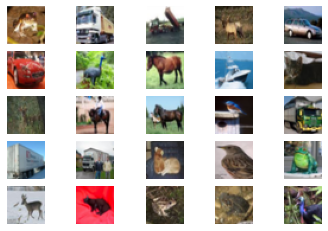

In [3]:
##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k])
            k = k+1
            plt.axis('off')
    plt.show()

    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

show_imgs(X_train)

In [4]:
print(np.amax(X_train))
type(X_test.shape[0])
npixels = 32*32*3

255


In [5]:
X_train =  X_train.reshape(X_train.shape[0], npixels)  # change the shape towards (60000, 784)
X_test =   X_test.reshape(X_test.shape[0], npixels)   # idem (10000, 784)
X_train =  X_train.astype('float32')    # change the type towards float32
X_test =   X_test.astype('float32')     # item
X_train /= 255                          # normalize the range to be between 0.0 and 1.0
X_test /=  255                          # item                     
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [6]:
print(y_train[0:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [7]:
n_classes = 10
Y_train = keras.utils.to_categorical(y_train, n_classes)    # modify targets to 1-hot using utils.to_categorical()
Y_test = keras.utils.to_categorical(y_test, n_classes)      # idem 
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


# One-layer network and weight visualisation
## Define the network

In [8]:
E = 5                 # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST

# ... define the model as a Sequential type
model = keras.models.Sequential()
# ... add a layer of type Dense with softmax activation
model.add(keras.layers.Dense(10, 
                        activation='softmax', 
                        input_shape=(D,),
                        kernel_regularizer=keras.regularizers.L2(0.05)))

# ... print model infomration with summary() method
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
None


2022-04-12 17:56:41.464365: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-12 17:56:41.464993: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-12 17:56:41.465186: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-12 17:56:41.465259: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [9]:
# ... compile the model with a crossentropy loss, rmsprop optimizer 
#      and defining metrics to be stored as history of the training

model.compile(optimizer='adam', 
            loss='categorical_crossentropy',
            metrics=['accuracy'])


In [10]:
# ... call the training with the fit() function giving the tensors as 
#     inputs, defining batch size, number of epochs and validation data
tf.keras.backend.clear_session()

log = model.fit(X_train, Y_train,  epochs=E, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/5
 146/1563 [=>............................] - ETA: 1s - loss: 2.9361 - accuracy: 0.2183

2022-04-12 17:56:45.313150: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1563/1563 [==============================] - 3s 1ms/step - loss: 2.2205 - accuracy: 0.2863 - val_loss: 2.0528 - val_accuracy: 0.3011
Epoch 2/5
1563/1563 [==============================] - 2s 1ms/step - loss: 2.0801 - accuracy: 0.3017 - val_loss: 2.0133 - val_accuracy: 0.3226
Epoch 3/5
1563/1563 [==============================] - 2s 1ms/step - loss: 2.0744 - accuracy: 0.3022 - val_loss: 2.0747 - val_accuracy: 0.2952
Epoch 4/5
1563/1563 [==============================] - 2s 1ms/step - loss: 2.0832 - accuracy: 0.3008 - val_loss: 2.0402 - val_accuracy: 0.3176
Epoch 5/5
1563/1563 [==============================] - 2s 1ms/step - loss: 2.0714 - accuracy: 0.3057 - val_loss: 1.9866 - val_accuracy: 0.3377


## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

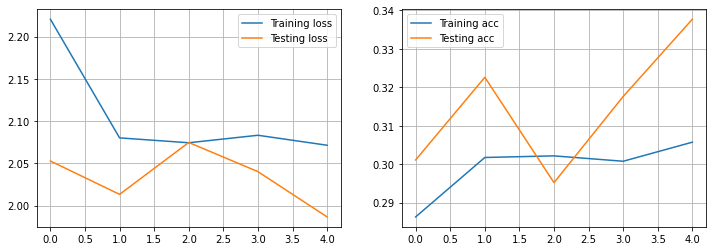

In [11]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [12]:
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)    # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 1.9866175651550293
Test accuracy: 0.3377000093460083


### Confusion matrix
We can call the `predict_classes()` function to get the predicted classes. The output of this function is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [13]:
pred = model.predict(X_test, verbose=1)
confusion_matrix(y_test, pred)

313/313 [==============================] - 0s 556us/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

### Plot the weights
The weights connected to a given neuron, when using a one-layer network, have the same shape as the input. They can therefore be plot. To do so we need to re-scale the weight values into 0-255 pixel values.

(3072, 10)
(10,)


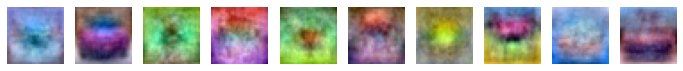

In [14]:
weights = model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
f = plt.figure(figsize=(12,12))
for i in range(10):
    ax = f.add_subplot(1, 10, 1+i)
    im = w1[:,i]                  # get the weights landing to neuron i
    im = im.reshape(32,32,3)        # reshape the vector of weights into 28x28 image
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    min = np.min(im)
    max = np.max(im)
    im = np.round((im - min)/(max - min) * 255).astype(int)
    ax.axis('off')
    ax.imshow(im,cmap='gray')

## Now with two layers
First as described in the exercise

In [15]:
E = 30                 # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST
HIDDEN = 128

# ... define the model as a Sequential type
model2 = keras.models.Sequential()
# ... add a layer of type Dense with softmax activation
model2.add(keras.layers.Dense(HIDDEN, 
                        activation='relu', 
                        input_shape=(D,)))

model2.add(keras.layers.Dense(10, 
                        activation='softmax', 
                        input_shape=(HIDDEN,)))

# ... print model infomration with summary() method
print(model2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
# Compile and fit the model
model2.compile(optimizer='adam', 
            loss='categorical_crossentropy',
            metrics=['accuracy'])

log = model2.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/30
391/391 [==============================] - 1s 2ms/step - loss: 1.9209 - accuracy: 0.3182 - val_loss: 1.7992 - val_accuracy: 0.3702
Epoch 2/30
391/391 [==============================] - 1s 2ms/step - loss: 1.7667 - accuracy: 0.3756 - val_loss: 1.7712 - val_accuracy: 0.3707
Epoch 3/30
391/391 [==============================] - 1s 2ms/step - loss: 1.6993 - accuracy: 0.3986 - val_loss: 1.6826 - val_accuracy: 0.4059
Epoch 4/30
391/391 [==============================] - 1s 2ms/step - loss: 1.6623 - accuracy: 0.4170 - val_loss: 1.6437 - val_accuracy: 0.4251
Epoch 5/30
391/391 [==============================] - 1s 2ms/step - loss: 1.6330 - accuracy: 0.4220 - val_loss: 1.6186 - val_accuracy: 0.4269
Epoch 6/30
391/391 [==============================] - 1s 2ms/step - loss: 1.6110 - accuracy: 0.4316 - val_loss: 1.6240 - val_accuracy: 0.4252
Epoch 7/30
391/391 [==============================] - 1s 2ms/step - loss: 1.5889 - accuracy: 0.4423 - val_loss: 1.5856 - val_accuracy: 0.4362
Epoch 

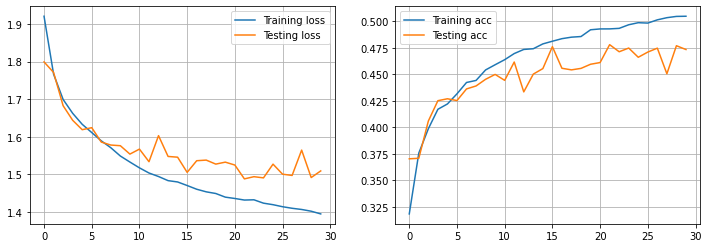

In [17]:
# Show performance
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [18]:
loss_test, metric_test = model2.evaluate(X_test, Y_test, verbose=0)    # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 1.5088433027267456
Test accuracy: 0.4733999967575073


Now with optimized parameters

In [19]:
E = 45                 # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST
HIDDEN = 128

# ... define the model as a Sequential type
modelOpt = keras.models.Sequential()
# ... add a layer of type Dense with softmax activation
modelOpt.add(keras.layers.Dense(HIDDEN, 
                        activation='relu', 
                        input_shape=(D,)))

modelOpt.add(keras.layers.Dropout(0.2))

modelOpt.add(keras.layers.Dense(10, 
                        activation='softmax', 
                        input_shape=(HIDDEN,)))

# ... print model infomration with summary() method
print(modelOpt.summary())



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               393344    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
# Compile and fit the model
modelOpt.compile(optimizer='adam', 
            loss='categorical_crossentropy',
            metrics=['accuracy'])

logOpt = modelOpt.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/45
391/391 [==============================] - 1s 2ms/step - loss: 2.0375 - accuracy: 0.2447 - val_loss: 1.8570 - val_accuracy: 0.3323
Epoch 2/45
391/391 [==============================] - 1s 2ms/step - loss: 1.9180 - accuracy: 0.2961 - val_loss: 1.8155 - val_accuracy: 0.3472
Epoch 3/45
391/391 [==============================] - 1s 2ms/step - loss: 1.8848 - accuracy: 0.3066 - val_loss: 1.7941 - val_accuracy: 0.3643
Epoch 4/45
391/391 [==============================] - 1s 2ms/step - loss: 1.8712 - accuracy: 0.3151 - val_loss: 1.7737 - val_accuracy: 0.3677
Epoch 5/45
391/391 [==============================] - 1s 2ms/step - loss: 1.8587 - accuracy: 0.3207 - val_loss: 1.7883 - val_accuracy: 0.3498
Epoch 6/45
391/391 [==============================] - 1s 2ms/step - loss: 1.8495 - accuracy: 0.3214 - val_loss: 1.7619 - val_accuracy: 0.3694
Epoch 7/45
391/391 [==============================] - 1s 2ms/step - loss: 1.8446 - accuracy: 0.3275 - val_loss: 1.7805 - val_accuracy: 0.3594
Epoch 

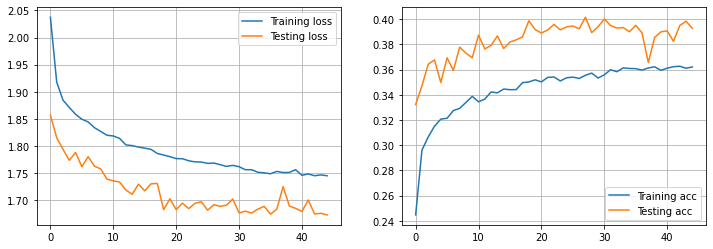

Test loss: 1.6731904745101929
Test accuracy: 0.3928000032901764


In [21]:
# Show performance
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(logOpt.history['loss'], label='Training loss')
ax1.plot(logOpt.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(logOpt.history['accuracy'], label='Training acc')
ax2.plot(logOpt.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

plt.show()

loss_test, metric_test = modelOpt.evaluate(X_test, Y_test, verbose=0)    # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

